# Imports



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)

In [5]:
df = pd.read_csv("../data/jobs.csv")
df.shape
df["job_family"].value_counts().head(15)
df["seniority"].value_counts()

seniority
regular    2795
senior      823
lead        114
manager      90
junior       55
intern       32
Name: count, dtype: int64

# Seniority distribution

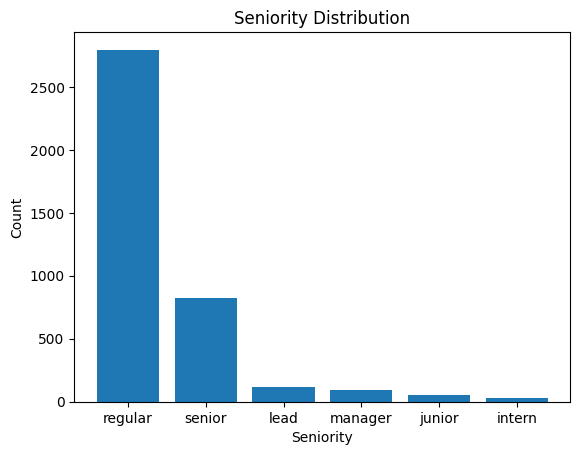

In [6]:
counts = df["seniority"].value_counts()
plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Seniority Distribution")
plt.xlabel("Seniority")
plt.ylabel("Count")
plt.show()

# Top locations


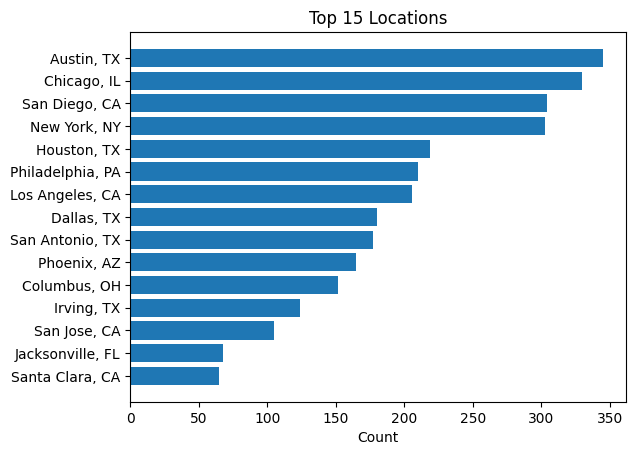

In [8]:
if "location" in df.columns:
    df["location"].value_counts().head(15)

if "location" in df.columns:
    top_locs = df["location"].value_counts().head(15)
    plt.figure()
    plt.barh(top_locs.index.astype(str), top_locs.values)
    plt.title("Top 15 Locations")
    plt.xlabel("Count")
    plt.gca().invert_yaxis()
    plt.show()

# Salary insights 

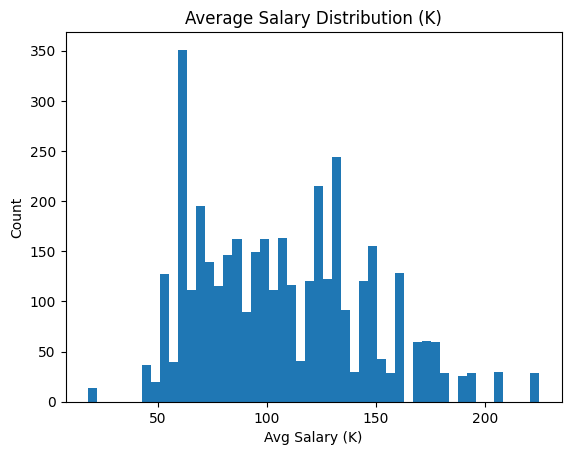

In [9]:
[c for c in ["min_salary_k", "max_salary_k", "avg_salary_k"] if c in df.columns]
if "avg_salary_k" in df.columns:
    plt.figure()
    plt.hist(df["avg_salary_k"], bins=50)
    plt.title("Average Salary Distribution (K)")
    plt.xlabel("Avg Salary (K)")
    plt.ylabel("Count")
    plt.show()

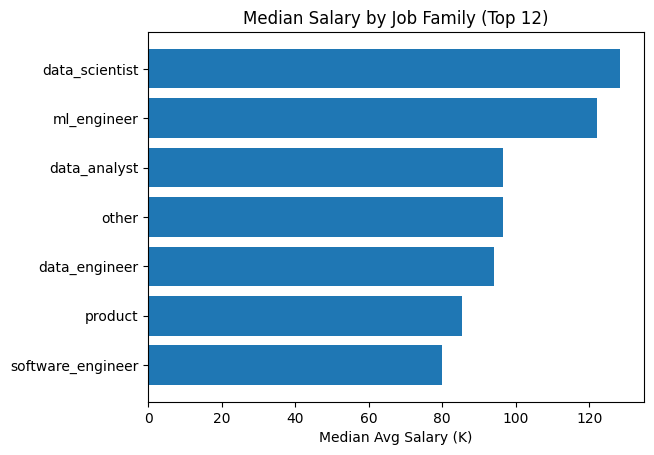

In [10]:
if "avg_salary_k" in df.columns:
    role_salary = df.groupby("job_family")["avg_salary_k"].median().sort_values(ascending=False)
    role_salary.head(15)
if "avg_salary_k" in df.columns:
    top_roles = role_salary.head(12)
    plt.figure()
    plt.barh(top_roles.index.astype(str), top_roles.values)
    plt.title("Median Salary by Job Family (Top 12)")
    plt.xlabel("Median Avg Salary (K)")
    plt.gca().invert_yaxis()
    plt.show()

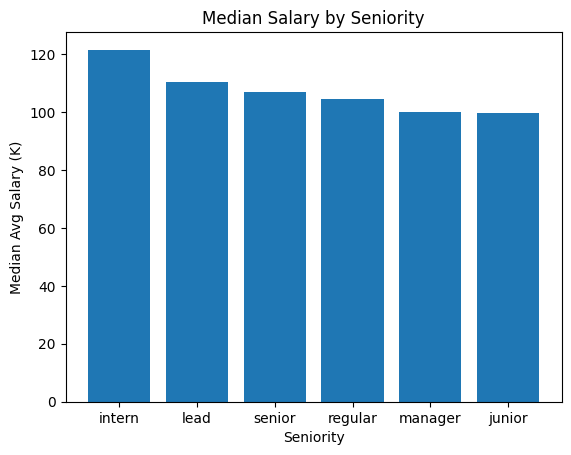

In [11]:
if "avg_salary_k" in df.columns:
    sen_salary = df.groupby("seniority")["avg_salary_k"].median().sort_values(ascending=False)
    sen_salary

if "avg_salary_k" in df.columns:
    plt.figure()
    plt.bar(sen_salary.index.astype(str), sen_salary.values)
    plt.title("Median Salary by Seniority")
    plt.xlabel("Seniority")
    plt.ylabel("Median Avg Salary (K)")
    plt.show()

# Job description length

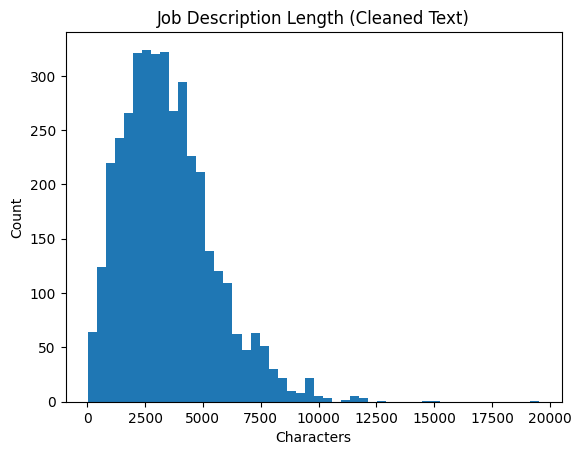

In [12]:
df["desc_len"] = df["job_description_clean"].astype(str).str.len()
df["desc_len"].describe()

plt.figure()
plt.hist(df["desc_len"], bins=50)
plt.title("Job Description Length (Cleaned Text)")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()

In [13]:
keywords = ["python", "sql", "aws", "excel", "spark", "power bi", "tableau", "nlp", "tensorflow", "pytorch"]

text = " ".join(df["job_description_clean"].dropna().astype(str).values)

for kw in keywords:
    print(f"{kw:10s} -> {text.count(kw)}")

python     -> 2845
sql        -> 3951
aws        -> 1683
excel      -> 2916
spark      -> 1466
power bi   -> 276
tableau    -> 903
nlp        -> 318
tensorflow -> 277
pytorch    -> 141


In [15]:
def kw_rate(group_df, keyword):
    t = group_df["job_description_clean"].astype(str).str.contains(keyword, regex=False).mean()
    return t

if "job_family" in df.columns:
    families = df["job_family"].value_counts().head(8).index.tolist()

    kw_table = []
    for fam in families:
        g = df[df["job_family"] == fam]
        row = {"job_family": fam}
        for kw in ["python", "sql", "aws", "excel", "nlp"]:
            row[kw] = kw_rate(g, kw)
        kw_table.append(row)

    kw_df = pd.DataFrame(kw_table).set_index("job_family")
    kw_df

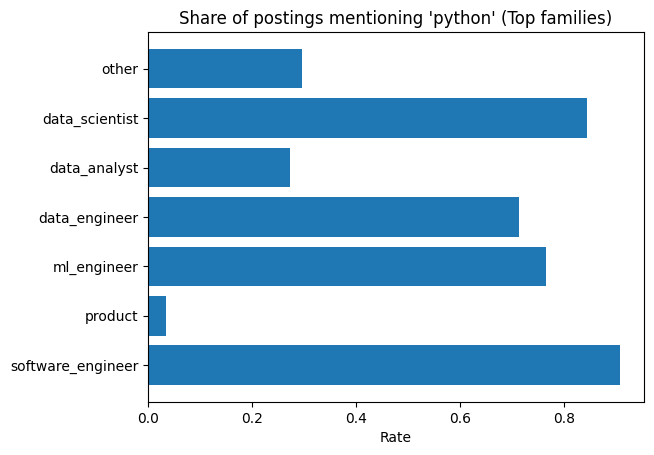

In [16]:
plt.figure()
plt.barh(kw_df.index.astype(str), kw_df["python"].values)
plt.title("Share of postings mentioning 'python' (Top families)")
plt.xlabel("Rate")
plt.gca().invert_yaxis()
plt.show()